<a href="https://colab.research.google.com/github/IamSamage/GW-Signal-Analysis/blob/main/GW_H1vs_L1_SNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 44.0.2 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.2 which is incompatible.


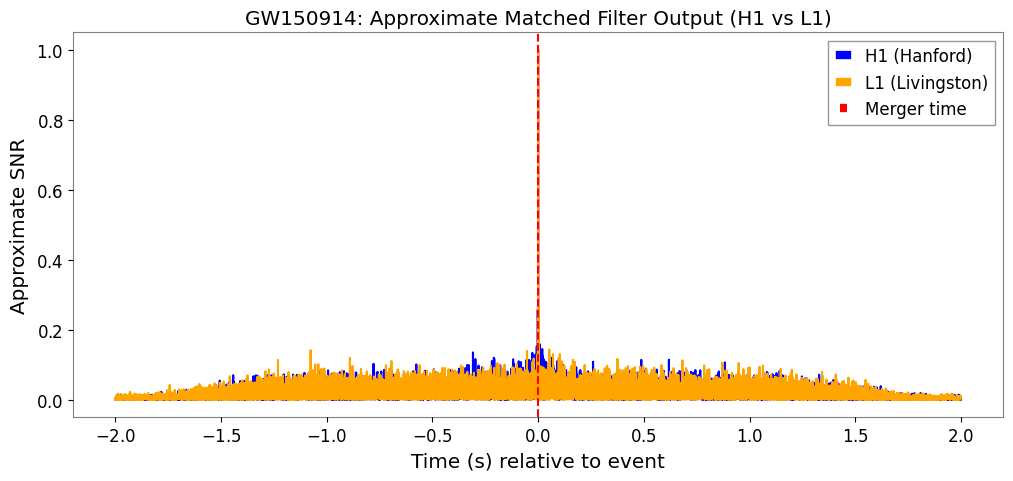

In [ ]:

!pip install gwpy --quiet

from gwpy.timeseries import TimeSeries
from gwpy.signal.filter_design import bandpass
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate

event_time = 1126259462.4
start = event_time - 4
end = event_time + 4

strain_h1 = TimeSeries.fetch_open_data('H1', start, end, sample_rate=4096)
strain_l1 = TimeSeries.fetch_open_data('L1', start, end, sample_rate=4096)

data_h1 = strain_h1.crop(event_time - 2, event_time + 2)
data_l1 = strain_l1.crop(event_time - 2, event_time + 2)

filt = bandpass(20, 400, 4096)
data_h1 = data_h1.filter(filt)
data_l1 = data_l1.filter(filt)

white_h1 = data_h1.whiten(2, 1)
white_l1 = data_l1.whiten(2, 1)

template_h1 = white_h1.crop(event_time - 0.1, event_time + 0.1)
template_l1 = white_l1.crop(event_time - 0.1, event_time + 0.1)

corr_h1 = correlate(white_h1.value - np.mean(white_h1.value),
                    template_h1.value - np.mean(template_h1.value),
                    mode='same')

corr_l1 = correlate(white_l1.value - np.mean(white_l1.value),
                    template_l1.value - np.mean(template_l1.value),
                    mode='same')

snr_h1 = np.abs(corr_h1) / np.max(np.abs(corr_h1))
snr_l1 = np.abs(corr_l1) / np.max(np.abs(corr_l1))

t = white_h1.times.value - event_time

plt.figure(figsize=(12, 5))
plt.plot(t, snr_h1, label='H1 (Hanford)', color='blue')
plt.plot(t, snr_l1, label='L1 (Livingston)', color='orange')
plt.axvline(0, color='r', linestyle='--', label='Merger time')
plt.xlabel("Time (s) relative to event")
plt.ylabel("Approximate SNR")
plt.title("GW150914: Approximate Matched Filter Output (H1 vs L1)")
plt.legend()
plt.grid()
plt.show()
